In [1]:
import sys
sys.path.append('/root/code/LLM/LSTM_from_wzw')
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D

In [9]:
import numpy as np
working_dir_LSTM=r'/root/code/LLM/anchor-function-new/result/GPT_anchorlength_normal'
acc_test_unmask_his_mean_all=[]
acc_test_unmask_his_std_all=[]
lsp_list=['0.0',  '0.1',  '0.2', '0.3', '0.4','0.5', '0.6', '0.7',  '0.8', '0.9',  '1.0']
acc_dict=np.load('/root/code/LLM/plot_for_anchor_func/anchor_length_task_acc_from_jiaweile_same_data_diff_model.npz', allow_pickle=True)





# for seed in ['1', '2', '3']:
#     for N in ['250', '300']:

test_3_lst_mean=[]
test_23_lst_mean=[]
test_123_lst_mean=[]
test_3_lst_std=[]
test_23_lst_std=[]
test_123_lst_std=[]

for N in ['300']:
    for lsp in lsp_list:
    # for lsp in ['1.0']:
        acc_list=acc_dict[lsp].item()[N]
        test_3_lst=[]
        test_23_lst=[]
        test_123_lst=[]
        for i in range(len(acc_list)//3):


            # acc_list_max=[max(i) for i in acc_list]
            # print(acc_list_max)
            test_3_lst.append(max(acc_list[3*i]))
            test_23_lst.append(max(acc_list[3*i+1]))
            test_123_lst.append(max(acc_list[3*i+2]))

        test_3_lst_mean.append(np.mean(test_3_lst))
        test_23_lst_mean.append(np.mean(test_23_lst))
        test_123_lst_mean.append(np.mean(test_123_lst))
        test_3_lst_std.append(np.std(test_3_lst))
        test_23_lst_std.append(np.std(test_23_lst))
        test_123_lst_std.append(np.std(test_123_lst))


test_3_lst_mean=np.array(test_3_lst_mean)
test_23_lst_mean=np.array(test_23_lst_mean)
test_123_lst_mean=np.array(test_123_lst_mean)
test_3_lst_std=np.array(test_3_lst_std)
test_23_lst_std=np.array(test_23_lst_std)
test_123_lst_std=np.array(test_123_lst_std)







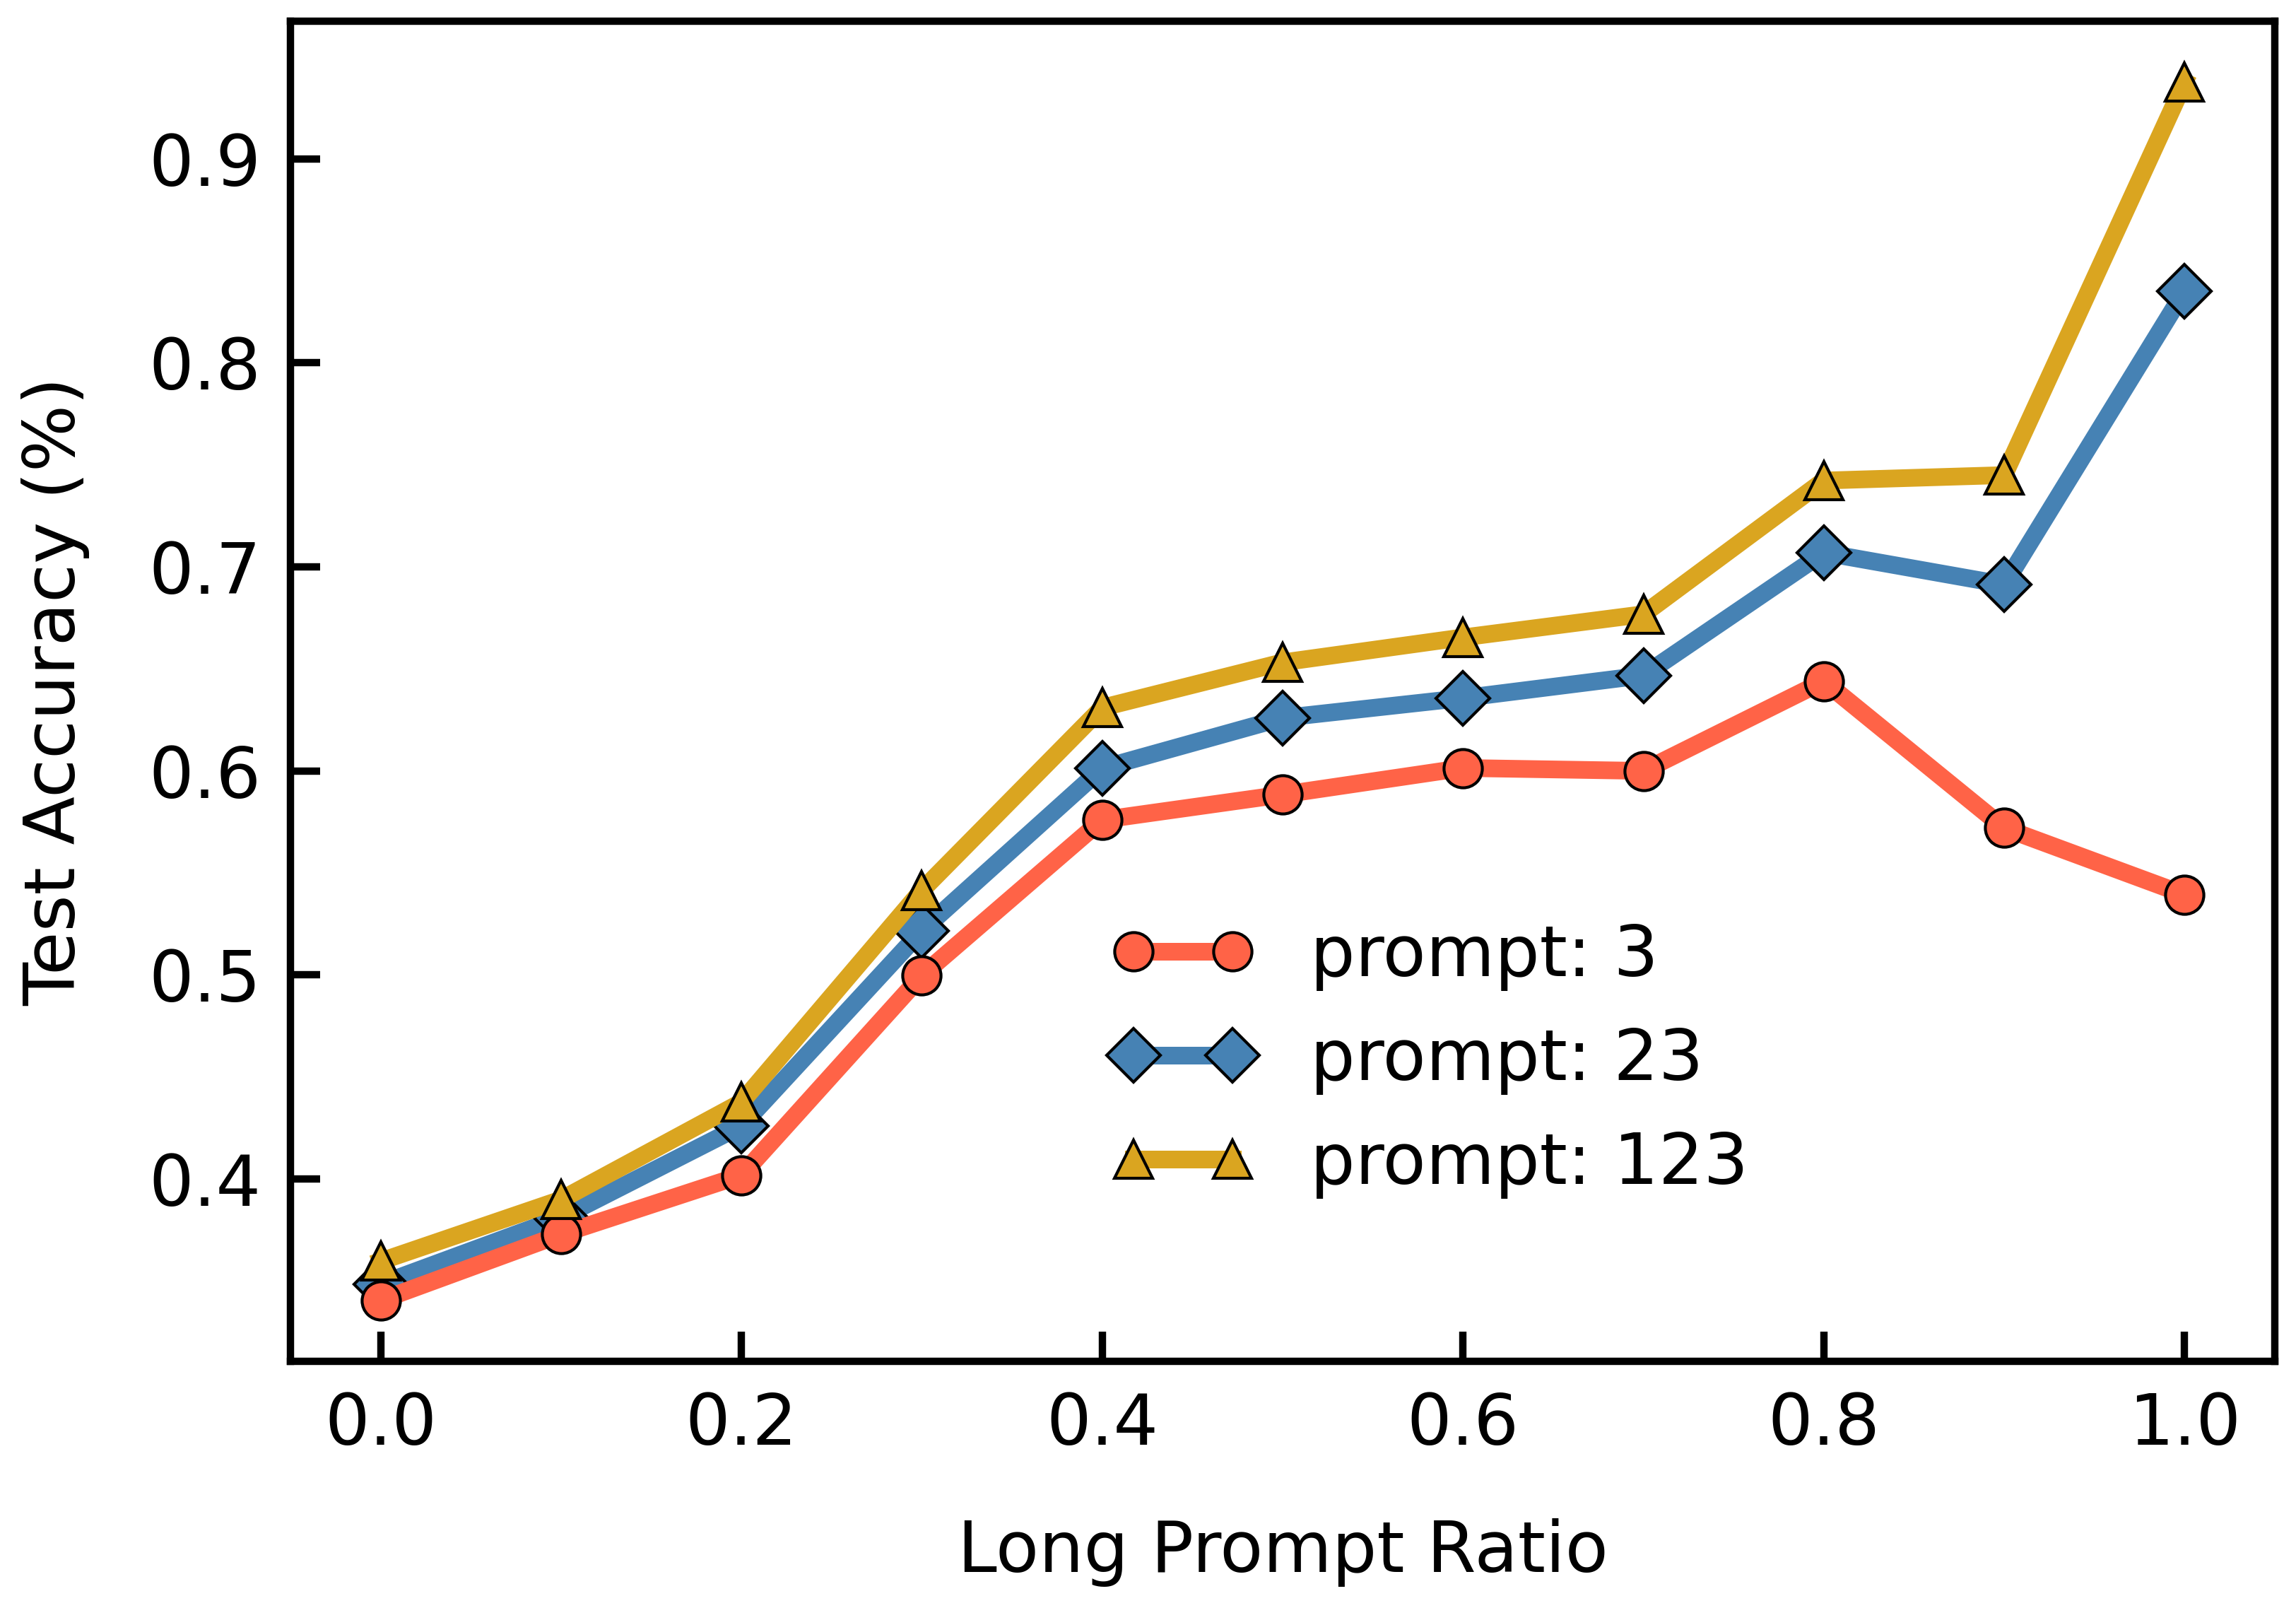

In [12]:
fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=24, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

ax = plt.gca()
handler_map = {}
color_list = ['tomato', 'steelblue', 'goldenrod', 'skyblue']
# color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
l1, = ax.plot(np.arange(0, 1.05, 0.1), test_3_lst_mean, label=f'prompt: 3',  color=color_list[0], 
        marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)
# ax.fill_between(np.arange(0, 1.05, 0.1), test_3_lst_mean+test_3_lst_std,
#                 test_3_lst_mean-test_3_lst_std, alpha=0.5, color=color_list[0])
l2, = ax.plot(np.arange(0, 1.05, 0.1), test_23_lst_mean, label=f'prompt: 23', color=color_list[1], 
        marker = 'D', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
# ax.fill_between(np.arange(0, 1.05, 0.1), test_23_lst_mean+test_23_lst_std,
#                 test_23_lst_mean-test_23_lst_std, alpha=0.5, color=color_list[1])
l3, = ax.plot(np.arange(0, 1.05, 0.1), test_123_lst_mean, label=f'prompt: 123',  color=color_list[2], 
                marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)    
# ax.fill_between(np.arange(0, 1.05, 0.1), test_123_lst_mean+test_123_lst_std,
#                 test_123_lst_mean-test_123_lst_std, alpha=0.5, color=color_list[2])  

handler_map[l1] = HandlerLine2D(numpoints=2)
handler_map[l2] = HandlerLine2D(numpoints=2)
handler_map[l3] = HandlerLine2D(numpoints=2)
handles = [l1, l2, l3]

# 如果存在mask的数据，则绘制mask数据的acc
# if plot_mask:
#         l3, = ax.plot(acc_epoch_his, acc_train_mask_his, label=f'train (mask)', lw=2, color=color_list[2], 
#                 marker = '^', markersize=9, markeredgewidth=1, markeredgecolor='black', zorder=6)        
#         l4, = ax.plot(acc_epoch_his, acc_test_mask_his, label=f'test  (mask)', color=color_list[3], 
#                 marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
        
#         handler_map[l3] = HandlerLine2D(numpoints=2)
#         handler_map[l4] = HandlerLine2D(numpoints=2)
#         handles.extend([l3, l4])

ax.set_xlabel('Long Prompt Ratio', labelpad=20, fontsize=24)
ax.set_ylabel('Test Accuracy (%)', labelpad=20, fontsize=24)
# ax.set_ylim(0.56, 1)
# ax.set_xticks([200,400,600,800])
# ax.set_xticklabels([200,400,600,800])
# ax.set_yticks([0.6, 0.8, 1])
# ax.set_yticklabels([60, 80, 100])

plt.legend(handler_map=handler_map, handles=handles, loc=(0.4, 0.1))
# plt.tight_layout()

plt.savefig(f'/root/code/LLM/plot_for_anchor_func/anchorlength_task.png')
plt.savefig(f'/root/code/LLM/plot_for_anchor_func/anchorlength_task.pdf')

In [14]:
import numpy as np
working_dir_LSTM=r'/root/code/LLM/anchor-function-new/result/GPT_anchorlength_normal'
acc_test_unmask_his_mean_all=[]
acc_test_unmask_his_std_all=[]
lsp_list=['0.0',  '0.1',  '0.2', '0.3', '0.4','0.5', '0.6', '0.7',  '0.8', '0.9',  '1.0']
acc_dict=np.load('/root/code/LLM/plot_for_anchor_func/anchor_length_task_acc_from_jiaweile_same_data_diff_model.npz', allow_pickle=True)





# for seed in ['1', '2', '3']:
#     for N in ['250', '300']:

test_3_lst_mean=[]
test_23_lst_mean=[]
test_123_lst_mean=[]
test_3_lst_std=[]
test_23_lst_std=[]
test_123_lst_std=[]

for N in ['250']:
    for lsp in lsp_list:
    # for lsp in ['1.0']:
        acc_list=acc_dict[lsp].item()[N]
        test_3_lst=[]
        test_23_lst=[]
        test_123_lst=[]
        print(len(acc_list))
        for i in range(len(acc_list)//3):


            # acc_list_max=[max(i) for i in acc_list]
            # print(acc_list_max)
            test_3_lst.append(max(acc_list[3*i]))
            test_23_lst.append(max(acc_list[3*i+1]))
            test_123_lst.append(max(acc_list[3*i+2]))

        test_3_lst_mean.append(np.mean(test_3_lst))
        test_23_lst_mean.append(np.mean(test_23_lst))
        test_123_lst_mean.append(np.mean(test_123_lst))
        test_3_lst_std.append(np.std(test_3_lst))
        test_23_lst_std.append(np.std(test_23_lst))
        test_123_lst_std.append(np.std(test_123_lst))


test_3_lst_mean=np.array(test_3_lst_mean)
test_23_lst_mean=np.array(test_23_lst_mean)
test_123_lst_mean=np.array(test_123_lst_mean)
test_3_lst_std=np.array(test_3_lst_std)
test_23_lst_std=np.array(test_23_lst_std)
test_123_lst_std=np.array(test_123_lst_std)









30
24
15
24
24
21
18
12
24
15
15


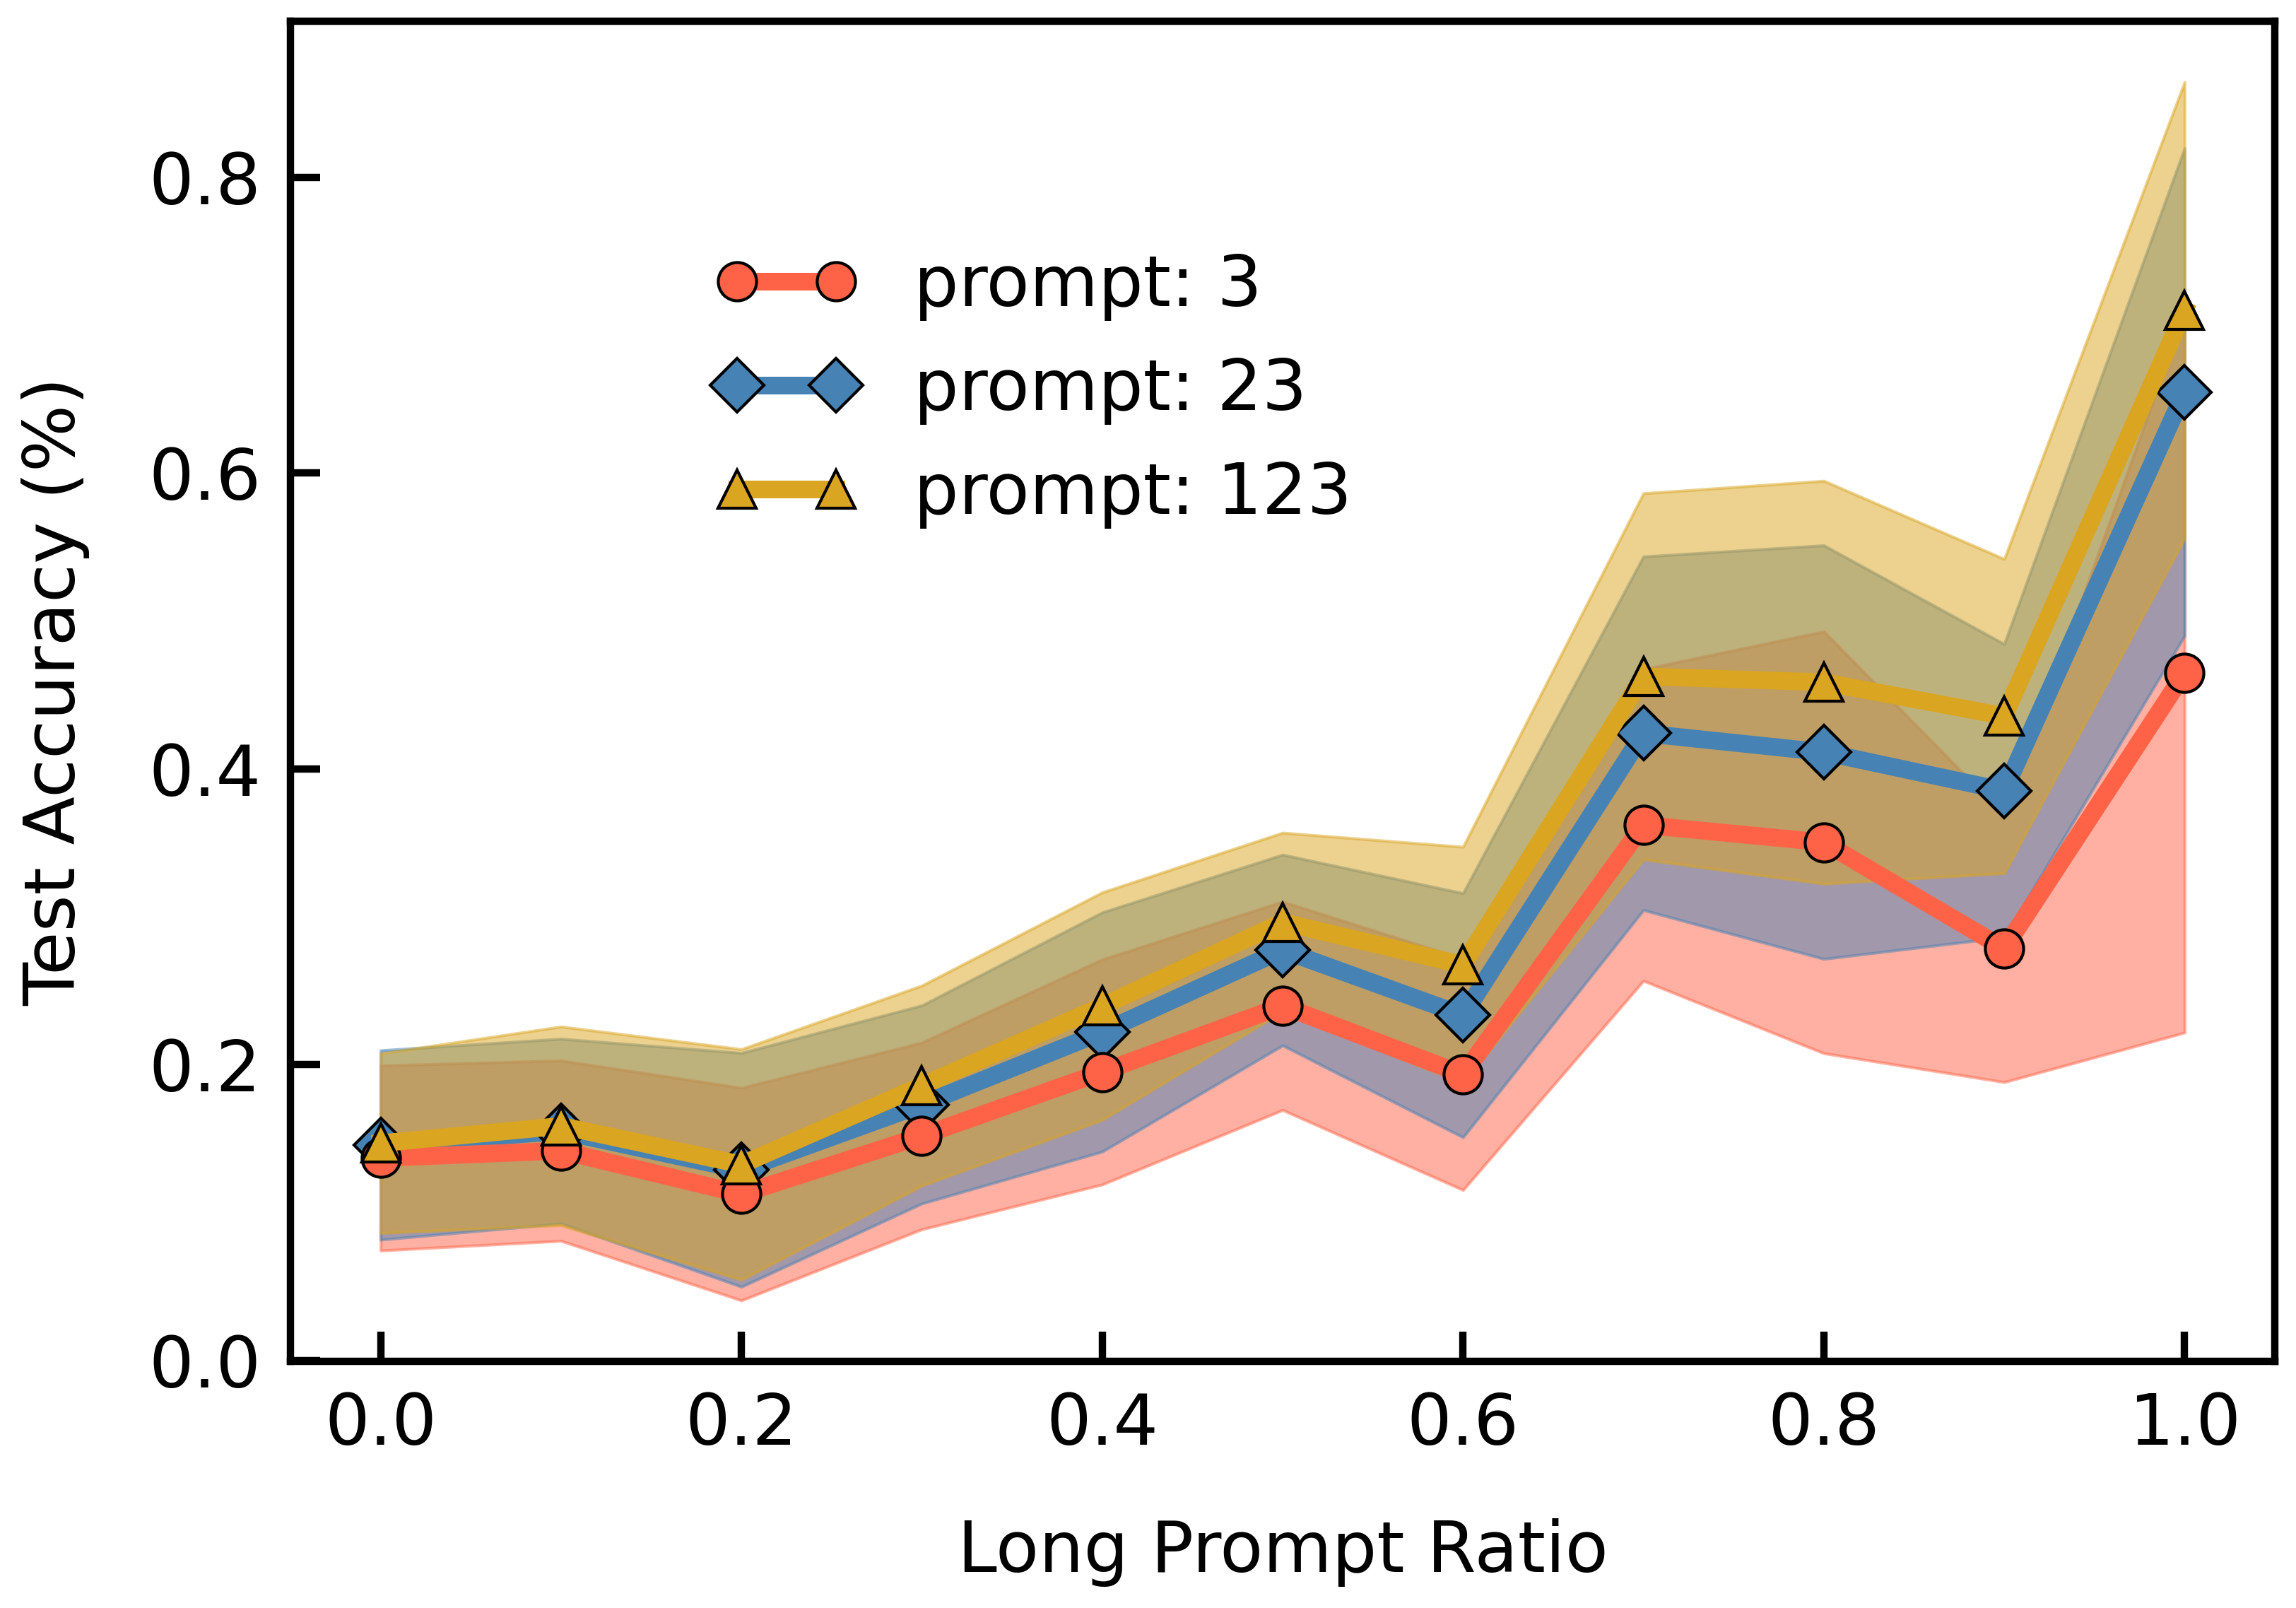

In [17]:
fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=24, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

ax = plt.gca()
handler_map = {}
color_list = ['tomato', 'steelblue', 'goldenrod', 'skyblue']
# color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
l1, = ax.plot(np.arange(0, 1.05, 0.1), test_3_lst_mean, label=f'prompt: 3',  color=color_list[0], 
        marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)
ax.fill_between(np.arange(0, 1.05, 0.1), test_3_lst_mean+test_3_lst_std,
                test_3_lst_mean-test_3_lst_std, alpha=0.5, color=color_list[0])
l2, = ax.plot(np.arange(0, 1.05, 0.1), test_23_lst_mean, label=f'prompt: 23', color=color_list[1], 
        marker = 'D', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
ax.fill_between(np.arange(0, 1.05, 0.1), test_23_lst_mean+test_23_lst_std,
                test_23_lst_mean-test_23_lst_std, alpha=0.5, color=color_list[1])
l3, = ax.plot(np.arange(0, 1.05, 0.1), test_123_lst_mean, label=f'prompt: 123',  color=color_list[2], 
                marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)    
ax.fill_between(np.arange(0, 1.05, 0.1), test_123_lst_mean+test_123_lst_std,
                test_123_lst_mean-test_123_lst_std, alpha=0.5, color=color_list[2])  

handler_map[l1] = HandlerLine2D(numpoints=2)
handler_map[l2] = HandlerLine2D(numpoints=2)
handler_map[l3] = HandlerLine2D(numpoints=2)
handles = [l1, l2, l3]

# 如果存在mask的数据，则绘制mask数据的acc
# if plot_mask:
#         l3, = ax.plot(acc_epoch_his, acc_train_mask_his, label=f'train (mask)', lw=2, color=color_list[2], 
#                 marker = '^', markersize=9, markeredgewidth=1, markeredgecolor='black', zorder=6)        
#         l4, = ax.plot(acc_epoch_his, acc_test_mask_his, label=f'test  (mask)', color=color_list[3], 
#                 marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
        
#         handler_map[l3] = HandlerLine2D(numpoints=2)
#         handler_map[l4] = HandlerLine2D(numpoints=2)
#         handles.extend([l3, l4])

ax.set_xlabel('Long Prompt Ratio', labelpad=20, fontsize=24)
ax.set_ylabel('Test Accuracy (%)', labelpad=20, fontsize=24)
# ax.set_ylim(0.56, 1)
# ax.set_xticks([200,400,600,800])
# ax.set_xticklabels([200,400,600,800])
# ax.set_yticks([0.6, 0.8, 1])
# ax.set_yticklabels([60, 80, 100])

plt.legend(handler_map=handler_map, handles=handles, loc=(0.2, 0.6))
# plt.tight_layout()

plt.savefig(f'/root/code/LLM/plot_for_anchor_func/anchorlength_task.png')
plt.savefig(f'/root/code/LLM/plot_for_anchor_func/anchorlength_task.pdf')